# Decision tree classification
understanding how to use scikit-learn library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
# for visualize decision tree
import graphviz
import pydotplus
from IPython.display import Image
from six import StringIO
import matplotlib.pyplot as plt

In [2]:
""" load data """
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
""" check validity """
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
""" check basic information """
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


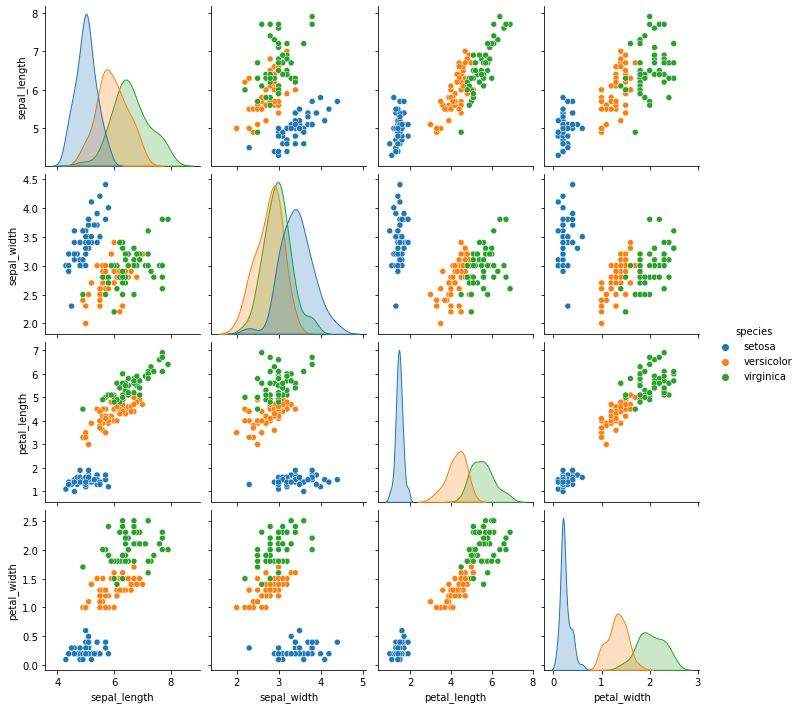

In [6]:
sns.pairplot(iris_df, hue='species')

In [7]:
""" split data """
train_df, test_df = train_test_split(iris_df, test_size=0.2, shuffle=True)

""" set training data """
train_input  = train_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
train_target = train_df[['species']]

""" set testing data """
test_input  = test_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
test_target = test_df[['species']]

In [8]:
train_input

,sepal_length,sepal_width,petal_length,petal_width
129,7.2,3.0,5.8,1.6
69,5.6,2.5,3.9,1.1
99,5.7,2.8,4.1,1.3
37,4.9,3.6,1.4,0.1
91,6.1,3.0,4.6,1.4
...,...,...,...,...
19,5.1,3.8,1.5,0.3
0,5.1,3.5,1.4,0.2
108,6.7,2.5,5.8,1.8
140,6.7,3.1,5.6,2.4


In [9]:
train_target

,species
129,virginica
69,versicolor
99,versicolor
37,setosa
91,versicolor
...,...
19,setosa
0,setosa
108,virginica
140,virginica


In [10]:
""" make instance of classifier model (all args are default values.)"""
tree = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=0,
    class_weight=None,
    ccp_alpha=0.0
)

""" training """
tree = tree.fit(train_input, train_target)

/home/hide2/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:316: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(


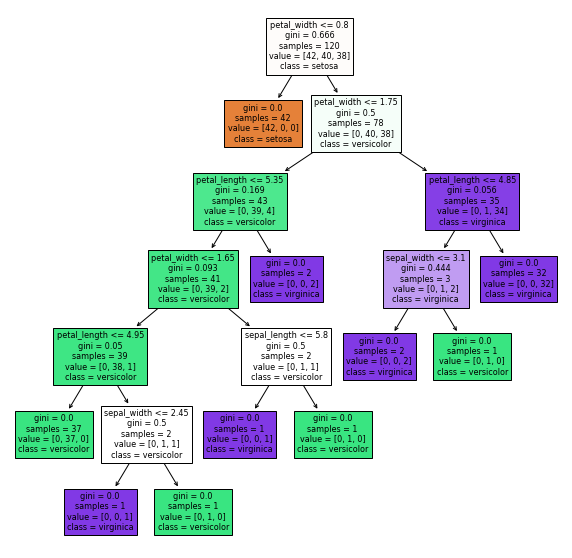

In [11]:
""" visualize model """
plt.figure(figsize=(10, 10))
_ =plot_tree(tree, feature_names=iris_df.columns, filled=True, class_names=tree.classes_)

### 上の木構造は毎回異なります。（テストデータとトレーニングデータに分けるときにシャッフルしているからです。）

In [12]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

[0.01251043 0.02919099 0.06266694 0.89563164]


<BarContainer object of 4 artists>

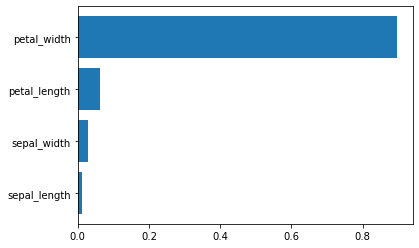

In [13]:
print(tree.feature_importances_)
plt.barh(train_input.columns, tree.feature_importances_)

In [14]:
print('depth', tree.get_depth())
print('n_leaves', tree.get_n_leaves())
print('params', tree.get_params())

depth 6
n_leaves 10
params {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [18]:
tree.score(test_input, test_target)

0.9666666666666667

In [15]:
def check_accuracy(target, output):
    if len(target) != len(output):
        raise Exception
    
    n_all = len(target)
    n_correct = 0
    for i in range(n_all):
        if target[i] == output[i]:
            n_correct += 1
            
    ratio = n_correct / n_all
    return ratio